# Algorithms 202: Coursework 1 Task 1: Sorting

Author: Jin Ha

# Objectives

The aim of this coursework is to enhance your algorithmic skills by mastering the divide and conquer and dynamic programming strategies. You are asked to show that you can:

- implement divide and conquer solutions for given problems
- compare naive and advanced implementations of algorithms solving the same problem

This notebook *is* the coursework. It contains cells with function definitions that you will need to complete. You will submit this notebook as your coursework.

The comparisons of different algorithms involve textual descriptions and graphical plots. For graphing you will be using [matplotlib](http://matplotlib.org/index.html) to generate plots. [This tutorial](http://matplotlib.org/index.html) will be useful to go through to get you up to speed. For the textual descriptions you may wish to use [LaTeX](http://en.wikipedia.org/wiki/LaTeX) inline like $\mathcal{O}(n\log{}n)$. Double click this cell to reveal the required markup - and [see here](http://texblog.org/2014/06/24/big-o-and-related-notations-in-latex/) for useful guidance on producing common symbols used in asymptotic run time analysis.

# Preliminaries: helper functions

Here we define a collection of functions that will be useful for the rest of the coursework. You'll need to run this cell to get started.

In [2]:
# so our plots get drawn in the notebook
%matplotlib inline
from matplotlib import pyplot as plt
from random import randint
from time import clock

# a timer - runs the provided function and reports the
# run time in ms
def time_f(f):
    before = clock()
    f()
    after = clock()
    return after - before

# remember - lambdas are just one line functions

# make us a random list length (between 1 - 2000)
rand_len = lambda max_len=2e3: randint(1, max_len)

# choose a random value for a list element (between 0 1e6)
rand_int = lambda: randint(0, 1e6)

# generate a random list of random length -
# here we use a list comprehension, a very tidy
# way of transforming lists of data
rand_list = lambda max_len=2e3: [rand_int() 
                                 for i in range(rand_len(max_len=max_len))]

## Task 1: Sorting

In this task you are asked to implement `insertion_sort` and `merge_sort`. You need to perform an experimental analysis of their running time. Based on your analysis, you should implement a third sorting algorithm, `hybrid_sort`, which is similar to `merge_sort` but uses `insertion_sort` for the base case. The problem size for which the base case is invoked has to be inferred from the running time analysis.

### 1a. Implement `insertion_sort`

Complete the below definition for `insertion_sort`. Do not change the name of the function or it's arguments. 


Hints:

- Your sort should be in-place (i.e. it changes the input list for the caller) but you should also return the list so the function can be called as indicated below.

In [4]:
def insertion_sort(a):
    return insertion_sort_helper(a, 1, len(a)-1)

def insertion_sort_helper(a, p, r):
    # complete function without changing signature
    for j in range(p,r+1):
        key = a[j]
        i = j-1
        while (i >= 0 and a[i] > key):
            a[i+1] = a[i]
            i = i-1
        a[i+1] = key
    return a

Use this test to confirm your implementation is correct.

In [5]:
x = [2, 4, 1, 3]
print(insertion_sort(x) == [1, 2, 3, 4])

True


### 1b. Implement `merge_sort`

Complete the below definition for `merge_sort`. Do not change the name of the function or it's arguments.

Hints:

- Your implementation should leave the input list unmodified for the caller
- You are free to define other functions in this cell

In [9]:
import math

def merge_sort(a):
    # complete function without changing signature
    do_merge_sort(a, 0, len(a) - 1)
    return a

def do_merge_sort(a, lowIdx, highIdx):
    if (lowIdx < highIdx):
        midIdx = math.floor((lowIdx + highIdx) / 2)
        do_merge_sort(a, lowIdx, midIdx)
        do_merge_sort(a, midIdx + 1, highIdx)
        merge(a, lowIdx, midIdx, highIdx)
        
def merge( a, lowIdx, midIdx, highIdx) :
    
    # nL = length of L, nR = length of R
    nL = midIdx - lowIdx + 1    
    nR = highIdx - midIdx
    
    # L = left sub-array, R = right sub-array
    L = []
    R = []
    
    # copy values from a to L
    for i in range(1, nL + 1):
        L.append(a[lowIdx + i - 1])
        
    # copy values from a to R
    for j in range(1, nR + 1):
        R.append(a[midIdx + j])
    
    # set sentinel
    L.append(100000)
    R.append(100000)
    
    i = 0
    j = 0
    
    # merge sub-arrays
    for k in range(lowIdx, highIdx + 1):
        if (L[i] <= R[j]):
            a[k] = L[i]
            i = i+1
        else:
            a[k] = R[j]
            j = j+1

Use this test to confirm your implementation is correct.

In [10]:
x = [2, 4, 1, 3]
print(merge_sort(x) == [1, 2, 3, 4])

True


### 1c. Analyse the running time performance of `insertion_sort` and `merge_sort`

Draw a graph showing the run time performance of your `insertion_sort` and `merge_sort` for different lengths of random integers. Analyse the performance at the large scale ($n \approx 10^3$) and small scale ($n \approx 10$). To remove noisy measurements, you might want to repeat the analysis several times and estimate average performance for different $n$.

(0, 0.25000000000000006)

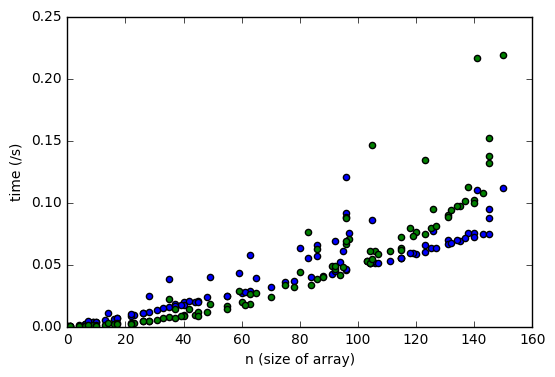

In [11]:
lengths = []
timeMerge = []
timeInsertion = []

for k in range(100):
    dataMerge = []
    dataInsertion = []
    
    x = randint(0, 150)
    
    for j in range(x):
        dataMerge.append(randint(0,1000))
        dataInsertion.append(randint(0,1000))
        
    timeMerge.append(time_f(lambda: merge_sort(dataMerge))*100)
    timeInsertion.append(time_f(lambda: insertion_sort(dataInsertion))*100)
    lengths.append(x)

plt.scatter(lengths, timeMerge, c='blue')
plt.scatter(lengths, timeInsertion, c='green')
plt.xlabel('n (size of array)')
plt.ylabel('time (/s)')
plt.xlim(0)
plt.ylim(0)

(0, 0.069999999999999993)

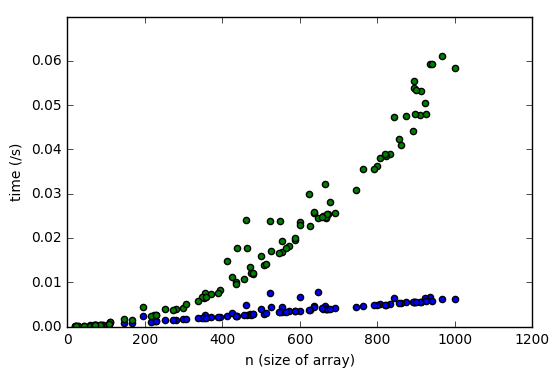

In [12]:
lengths = []
timeMerge = []
timeInsertion = []

for k in range(100):
    dataMerge = []
    dataInsertion = []
    
    x = randint(0, 1000)
    
    for j in range(x):
        dataMerge.append(randint(0,1000))
        dataInsertion.append(randint(0,1000))
        
    timeMerge.append(time_f(lambda: merge_sort(dataMerge)))
    timeInsertion.append(time_f(lambda: insertion_sort(dataInsertion)))
    lengths.append(x)

plt.scatter(lengths, timeMerge, c='blue')
plt.scatter(lengths, timeInsertion, c='green')
plt.xlabel('n (size of array)')
plt.ylabel('time (/s)')
plt.xlim(0)
plt.ylim(0)

**Now discuss your findings in a few lines in the below cell:**

In order to examine the differences between merge sort and insertion sort more clearly for smaller n, we chose to multiply by a factor of 100 and then plot the results. After repeating the compilation of the graph several times, we saw that for n approximately less than 80, insertion sort performed more efficiently than merge sort.
However after the limit, for n greater than 80 we see that insertion sort becomes much less efficient in comparison to merge sort. Overall, merge sort is $\mathcal{O}(n\log{}n)$ whereas insertion sort is $\mathcal{O}(n^2)$
, and this is evident in the graphs that we have created.

### 1d. Implement `hybrid_sort()`

Implement `hybrid_sort()`, a `merge_sort()` variant which uses `insertion_sort()` for the base case. The problem size for which the base case is invoked has to be inferred from your above running time analysis.

In [13]:
THRESHOLD_VALUE = 30;

def hybrid_sort(a):
    hybrid_sort_helper(a, 0, len(a) - 1)
    return a

def hybrid_sort_helper(a, p, r):
    if ((r-p) < THRESHOLD_VALUE):
        insertion_sort_helper(a, p, r)
    elif (p < r):
        q = math.floor((p+r)/2)
        hybrid_sort_helper(a, p, q)
        hybrid_sort_helper(a, q+1, r)
        merge(a, p, q, r)

Use this test to confirm your implementation is correct.

In [14]:
x = [2, 4, 1, 3]
print(hybrid_sort(x) == [1, 2, 3, 4])

True


### 1e. Analyse all three sorting implementations together

Draw a graph showing the running time performance of your `insertion_sort()`, `merge_sort()` and `hybrid_sort()` for different lengths of random integers.

(0, 5.0)

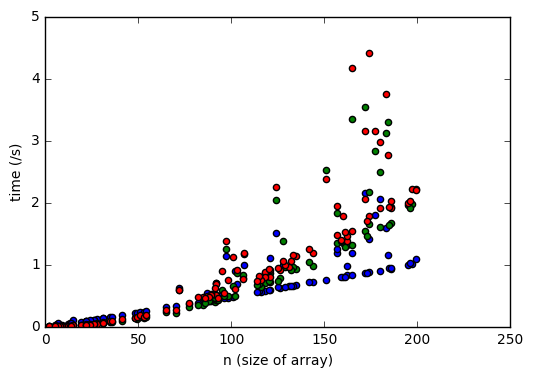

In [15]:
tk = []
nk = []
tr = []
tl = []

for k in range(100):
    L = []
    R = []
    P = []
    
    x = randint(0,200)
    
    for j in range(x):
        L.append(randint(0,1000))
        R.append(randint(0,1000))
        P.append(randint(0,1000))
        
    tk.append(time_f(lambda: merge_sort(L))*1000)
    tr.append(time_f(lambda: insertion_sort(R))*1000)
    tl.append(time_f(lambda: hybrid_sort(P))*1000)
    nk.append(x)
    
plt.scatter(nk, tk, c='blue')
plt.scatter(nk, tr, c='green')
plt.scatter(nk, tl, c='red')
plt.xlabel('n (size of array)')
plt.ylabel('time (/s)')
plt.xlim(0)
plt.ylim(0)

**Now discuss your findings in a few lines in the below cell:**

The hybrid sort algorithm runs in $\mathcal{O}(nk + n\log{n/k})$ worse case time complexity. We experimented by changing the value of k, which for us is called the threshold_value. We noticed that increasing the threshold causes hybrid sort to behave similarly to insertion sort, because insertion sort is being carried out on more elements of the array. In practice, this threshold value needs to be adjusted to the size of arrays that we are trying to sort. So overall, mergesort still seems to be the most efficient out of the three algorithms. From further research, this modification should improve the running time of a typical mergesort implementation by 10 to 15%.